# Task 1 U got package

In [7]:
from u_got_package import U_GotPackage, RandomPolicy, run_episode
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

## Environment description

Inspired from a famous Israeli game invented by Ephraim Kishon.

See :https://boardgamegeek.com/boardgame/38411/package-has-arrived and about game inventor: https://en.wikipedia.org/wiki/Ephraim_Kishon

#### Description:

One day you receive a letter informing you that a package has arrived for you from your dear sister in Australia.
Happily you go to the post office to recieve your package.
When you arrive there you unfortunately realize that you are going to have to go through some buracracy stations in order to actually recieve your package.

#### Stations:

 - **Post office**: Only if you arrive here with customs paid and a utility bill you can get the package
    
    
 - **Bank branch**: 
    Here you can pay customs payment
    You need to have utility bill before recieving the service.
    Sometimes when in a bad mood they can send you to bring also a vaccination approval
    (*0.3 chance of bad mood*)
    You also must have enough money to pay the customs.
    If you arrive here without all documents needed or without enough money or after you already paid customs,
    you  will get a fine for wasting their time.
    

 - **Council office**:
    Here you can get a new copy of the utility bill.
    They usually require you to show a vaccination approval in order to enter the building but sometimes they 
    forget to ask about it (*0.2 chance*).
    If you arrive here without vaccination approval (in case it is required) or after you already got the 
    utility bill you  will get a fine for wasting their time.
    

 - **GP**:
    Here you can receive a letter approving you have been vaccinated.
    If you arrive here after you already recieved a vaccination approval, you will get a fine for wasting 
    their time.
    

 - **Job1**:
    If you arrive here you can do a job and recieve money.
    The payment start at 3 pounds but there is a timely paycut.
    You can only do the job once.
    
    
 - **Job2**:
    If you arrive here you can do a job and recieve money.
    The payment start at 2 pounds but there is a timely paycut.
    You can only do the job once.
    
 
 - **People**:
    Unforuntately the enviroment has been hit by a pandemic..
    There are people in the environemnt and you have to keep social distancing of at least 1 cell apart.
    Otherwise you get a fine.
    
   

### State representation

The state will be represented in the folowing tuple:

#### (position_y, position_x, has_utility_bill, has_paid_customs, has_vacc_approval, money_earned)

- **position y, x** : integer from 0 to N (N*N size of environment)
- **has_utility_bill,has_paid_customs,has_vacc_approval**: 0/1(binary)  0-if not achieve yet by agent,  1- achieved
- **money earned** : interger between 0 -Sum of max payment of the two jobs Total amount of money earned so far 


#### Number of states is : N x N x 8 x sum of max earnings


### Rewards 

The rewards are the following:

    Bank reward on success : 6 x N x N

    Council office reward on success : 3 xN xN

    GP reward on success : N x N

    Post Office:  Is a terminal states and is success the reward is 0

    Penalty on waste of time : -N/2

    Penalty for not keeping social distancing from people : -N/3

#### Other configuration:

    Max earning for Job 1 :3 (When the game start)
    Max earning for Job 2 :2 (When the game start)
    
    Timeunits to paycut: Nx N timeunits. paycut is -1.
    
    Payment for customs : *Parameter*
    
    Number of people: N//4 

##### Game start:
    
    The starting point of the agent is random.
    The positions of people can change each game

In [8]:
#Set seed to reproduce results
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [9]:
#We will build an example environment of size 10*10
N=10
CUSTOMS_PAY=3

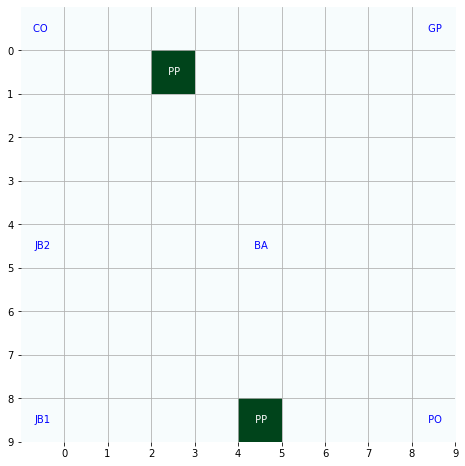

Agent state:
Position X: 1 Position Y: 8
Has utility bill: False Has paid customs: False 
Has vacc approval: False


In [10]:
env = U_GotPackage(N=N, custom_pay=CUSTOMS_PAY)
env.reset()
env.display2()

## Running the game with random policy

In [11]:
#Create random policy
random_policy=RandomPolicy(env.num_actions)

#run game
reward, timesteps, got_package=run_episode(env,random_policy, train=False, render=True)





=   =  =  =  =  =  =  =  =  =  =  =
=  CO  |  |  |  |  |  |  |  |  GP =
=   |  |  |  PP |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=  JB2 |  |  |  |  BA |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=  JB1 |  |  |  PP |  |  |  |  PO =
=   =  =  =  =  =  =  =  =  =  =  =

Action:LEFT
UTILITY: False PAID CUSTOMS: False 
VACC APPROVAL: False MONEY_EARNED: 0
=   =  =  =  =  =  =  =  =  =  =  =
=  CO  |  |  |  |  |  |  |  |  GP =
=   |  |  |  PP |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=  JB2 |  |  |  |  BA |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=   |  |  |  |  |  |  |  |  |  |  =
=  JB1 |  |  |  PP |  |  |  |  PO =
=   =  =  =  =  =  =  =  =  =  =  =

Action:LEFT
UTILITY: False PAID CUSTOMS: False 
V

In [12]:
print(f'Reward: {reward}')
print(f'timesteps: {timesteps}')

Reward: 43
timesteps: 200
